In [ ]:
train_dataset = '/content/train.csv'
test_dataset = '/content/test.csv'

In [ ]:
import pandas as pd
train_data = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_data = pd.read_csv(test_dataset,encoding="ISO-8859-1")
data = pd.concat([train_data,test_data])

In [ ]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
final_corpus = data['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = data["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
import string
import re
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
data_eda['text'] = data_eda["text"].apply(wp)

In [ ]:
data_eda

,text,sentiment
0,Id have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,Sons of why couldnt they put them on the rel...,negative
...,...,...
27475,wish we could come see u on Denver husband l...,negative
27476,Ive wondered about rake to The client has ma...,negative
27477,Yay good for both of you Enjoy the break you...,positive
27478,But it was worth it,positive


In [ ]:
data_eda.to_csv("data_eda.csv", index=False)

In [ ]:
data_eda['sentiment_code'] = data_eda['sentiment'].astype('category').cat.codes

In [ ]:
X=data_eda['text']
y= data_eda['sentiment_code']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(X)

In [ ]:
input_sequences = []
for sentence in X:
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    input_sequences.append(tokenized_sentence)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LENGTH = max([len(x) for x in input_sequences])
print(MAX_LENGTH)

32


In [ ]:
enocoder_input = pad_sequences(input_sequences, maxlen=MAX_LENGTH, padding='pre')

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [ ]:
input = Input(shape=(MAX_LENGTH,))
x = Embedding(len(tokenizer.word_index)+1, 10)(input)
x = LSTM(64)(x)
output = Dense(3, activation='softmax')(x)

model = Model(input, output)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 32, 10)              │         265,370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,765 (1.09 MB)

 Trainable params: 284,765 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(enocoder_input, y, epochs=20)

Epoch 1/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5048 - loss: 0.9665
Epoch 2/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7533 - loss: 0.6052
Epoch 3/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8292 - loss: 0.4513
Epoch 4/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8773 - loss: 0.3396
Epoch 5/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9070 - loss: 0.2741
Epoch 6/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9216 - loss: 0.2268
Epoch 7/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9303 - loss: 0.2053
Epoch 8/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9397 - loss: 0.1826
Epoch 9/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9445 - loss: 0.1634
Epoch 10/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9545 - loss: 0.1389
Epoch 11/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9586 - loss: 0.1221
Epoch 12/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/st

In [ ]:
def SentimentAnalysis(text):
    sentece = [text]
    tokenized_sentence = tokenizer.texts_to_sequences(sentece)
    input_sequence = pad_sequences(tokenized_sentence, maxlen=MAX_LENGTH, padding='pre')
    prediction_ = model.predict(input_sequence)
    print(prediction_)
    prediction = prediction_.argmax()
    print(prediction)
    if prediction == 0:
        print(f"Negative 😠: [confidence - {prediction_[0][0]*100:.2f}%]")
    elif prediction == 1:
        print(f"Neutral 😐: [confidence - {prediction_[0][1]*100:.2f}%]")
    else:
        print(f"Positive 😊: [confidence -  {prediction_[0][2]*100:.2f}%]")
    plot = pd.DataFrame(prediction_, columns=['Negative', 'Neutral', 'Positive'])
    plot.plot(kind='barh')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[9.6181667e-01 3.7293959e-02 8.8940299e-04]]
0
Negative 😠: [confidence - 96.18%]


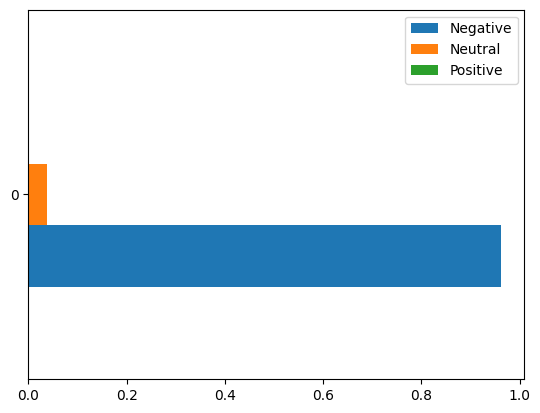

In [ ]:
SentimentAnalysis(" bad ")

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 1. Evaluate on Training Data
train_loss, train_accuracy = model.evaluate(enocoder_input, y)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# 2. Split Data for Testing
X_test = enocoder_input[-len(test_data):]  # Assuming last part of your data is test set
y_test = data_eda['sentiment_code'][-len(test_data):]

# 3. Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 4. Generate Predictions and Calculate Metrics
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate Accuracy and Display Classification Report
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy (manual): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_labels, target_names=['negative', 'neutral', 'positive']))


859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0434
Training Accuracy: 98.57%
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0318
Test Accuracy: 98.67%
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy (manual): 98.67%
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98      1386
     neutral       0.99      0.99      0.99      1987
    positive       0.99      0.98      0.99      1442

    accuracy                           0.99      4815
   macro avg       0.99      0.99      0.99      4815
weighted avg       0.99      0.99      0.99      4815



859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9850 - loss: 0.0434
Training Accuracy: 98.57%
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0318
Test Accuracy: 98.67%
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy (manual): 98.67%
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98      1386
     neutral       0.99      0.99      0.99      1987
    positive       0.99      0.98      0.99      1442

    accuracy                           0.99      4815
   macro avg       0.99      0.99      0.99      4815
weighted avg       0.99      0.99      0.99      4815



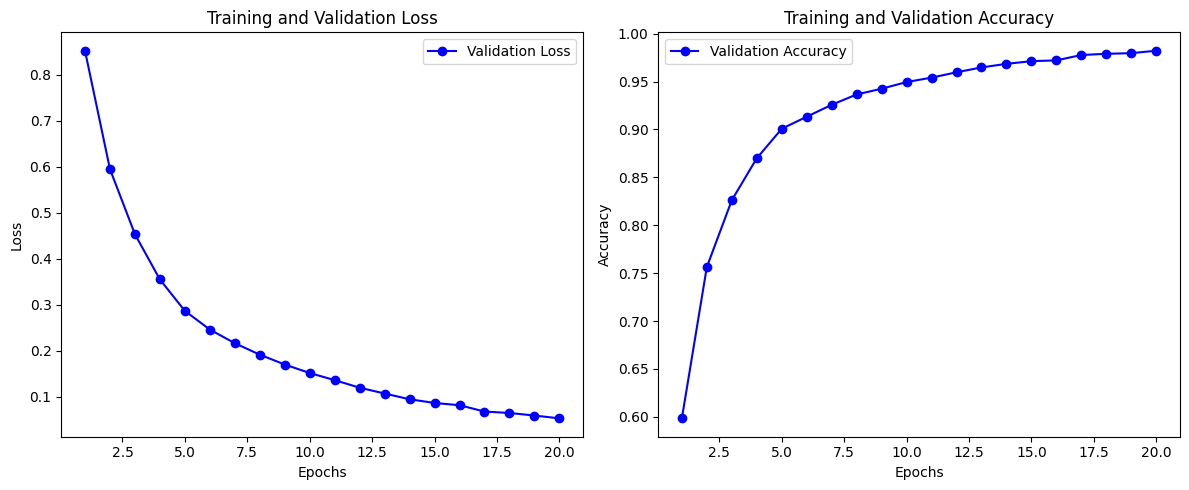

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 1. Evaluate on Training Data
train_loss, train_accuracy = model.evaluate(enocoder_input, y)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# 2. Split Data for Testing
X_test = enocoder_input[-len(test_data):]  # Assuming last part of your data is the test set
y_test = data_eda['sentiment_code'][-len(test_data):]

# 3. Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 4. Generate Predictions and Calculate Metrics
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate Accuracy and Display Classification Report
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy (manual): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_labels, target_names=['negative', 'neutral', 'positive']))

# 5. Plot Training and Validation Accuracy and Loss
# Assuming `history` is the object returned by `model.fit()`
if 'history' in locals():  # Check if history is available
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['loss'], 'bo-', label='Validation Loss')
    # Check if 'val_loss' is present in history_dict before plotting
    if 'val_loss' in history_dict:
        plt.plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Validation Accuracy')
    # Check if 'val_accuracy' is present in history_dict before plotting
    if 'val_accuracy' in history_dict:
        plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Training history not available. Ensure you save the `history` object from `model.fit()`.")